In [1]:
# libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('Clothing.csv')
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [3]:
df.columns

Index(['tsales', 'sales', 'margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw',
       'hourspw', 'inv1', 'inv2', 'ssize', 'start'],
      dtype='object')

# Analysing the data

In [5]:
df.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


In [21]:
# Picking variables
df_c = df[["tsales", "margin", "inv1", "inv2", "ssize", "start"]]
df_c.head()

,tsales,margin,inv1,inv2,ssize,start
0,750000,41.0,17166.67,27177.04,170,41.0
1,1926395,39.0,17166.67,27177.04,450,39.0
2,1250000,40.0,292857.20,71570.55,300,40.0
3,694227,40.0,22207.04,15000.00,260,40.0
4,750000,44.0,22207.04,10000.00,50,44.0


# Data analysis

In [22]:
# summary statistics
df_c.describe()

,tsales,margin,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,1.500000e+06,400000.000000,1214.000000,90.000000


<Axes: >

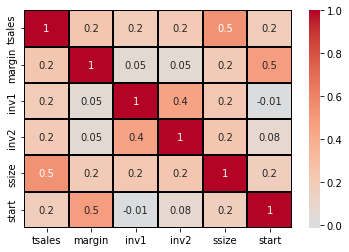

In [23]:
# Correlation Matrix
sns.heatmap(df_c.corr(),
           annot=True,
           center=0,
           cmap="coolwarm",
           fmt=".1g",
           linewidths=2,
           linecolor="black")

# Multilinear regression prep

In [11]:
# prepare X and y
y = df_c["tsales"]
X = df_c.drop(columns=["tsales"])
X = sm.add_constant(X)
X.head(2)

,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0
1,1.0,39.0,2.0,17166.67,27177.04,450,39.0


In [12]:
# training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

# Multilinear regression

In [13]:
# Regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           5.64e-23
Time:                        11:52:14   Log-Likelihood:                -4635.1
No. Observations:                 320   AIC:                             9284.
Df Residuals:                     313   BIC:                             9311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.749e+05   2.07e+05     -0.843      0.4

In [14]:
predictions = model.predict(X_test)
predictions.head()

270    1.621699e+06
380    7.713513e+05
326    6.928708e+05
60     6.435912e+05
316    3.098840e+05
dtype: float64

# Accuaracy Assessment

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ",round(mean_absolute_error(y_test, predictions), 2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, predictions)),2))

MAE:  346929.51
RMSE: 529017.51
